In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("life_data.csv")

In [3]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Here we can see that. This dataset contains data from year 2000 to year 2015. 
Life expectancy is increasing. Between year 2000 to year 2004, life expectancy increased rapidly.
Alcohol consumption increased very fast after 2012. 

this is basic understanding from this data

In [4]:
#checking for the data is of how many countries.
country = len(set(data["Country"]))
print(f"This dataset consists data of {country} countries.")

This dataset consists data of 193 countries.


lets polish the column names

In [5]:
data.rename(columns=lambda x: x.strip().replace(' ', '_').replace('-', '_').lower(), inplace=True)
#this will replace spaces with underscore and hyphen with underscore

In [6]:
#checking for any null values
val = data.isnull().sum()
val

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

We found many missing values. lets fix them. by group filling. 
why group filling?
- to maintain the quality of data. as every country has its own wheather condition and financial factors, so we have to make it separated.

In [7]:
backup = data.copy()

In [8]:
for col in backup.columns:
    if backup[col].isnull().any() and backup[col].dtype in [np.float64, np.int64]:
        backup[col] = backup.groupby('country')[col].transform(lambda x: x.fillna(x.mean()))


In [9]:
backup.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                             17
percentage_expenditure               0
hepatitis_b                        144
measles                              0
bmi                                 34
under_five_deaths                    0
polio                                0
total_expenditure                   32
diphtheria                           0
hiv/aids                             0
gdp                                405
population                         648
thinness__1_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [10]:
backup.fillna(backup.median(numeric_only=True), inplace=True)
print(backup.isnull().sum())

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1_19_years               0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64


we have successfully cleaned the dataset. 
without compromising the quality of data

In [11]:
backup.to_csv("cleaned_data.csv", index=False)

Now we have exported data to file "cleaned_csv"
- Lets visualize it. 

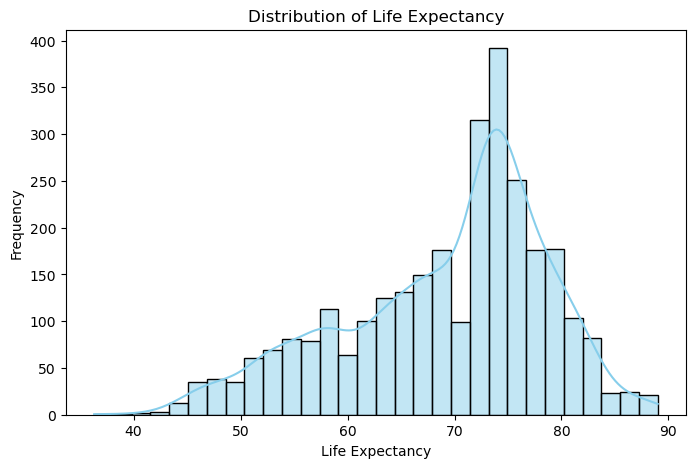

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data=backup, x='life_expectancy', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

Insights : 

- The life expectancy across the world mostly falls between 65–80 years, with a peak around 73 years.
- The data is slightly left-skewed, indicating that a small number of countries still have very low life expectancy, which pulls the lower tail.
- This visualization highlights inequality in global health and development — which we can explore further by analyzing country status, GDP, and healthcare indicators.

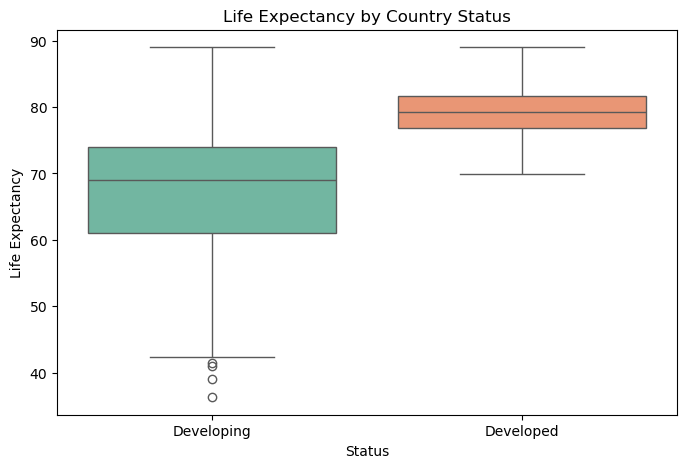

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(data=backup, x='status', y='life_expectancy', hue='status', palette='Set2', legend=False)
plt.title('Life Expectancy by Country Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()


Insights : 

- Developed countries have higher and more consistent life expectancy.
- Developing countries show larger variation and many low outliers, indicating unequal access to healthcare and resources.
- This emphasizes the development-health inequality gap — worth deeper analysis with GDP, schooling, and immunization rates.

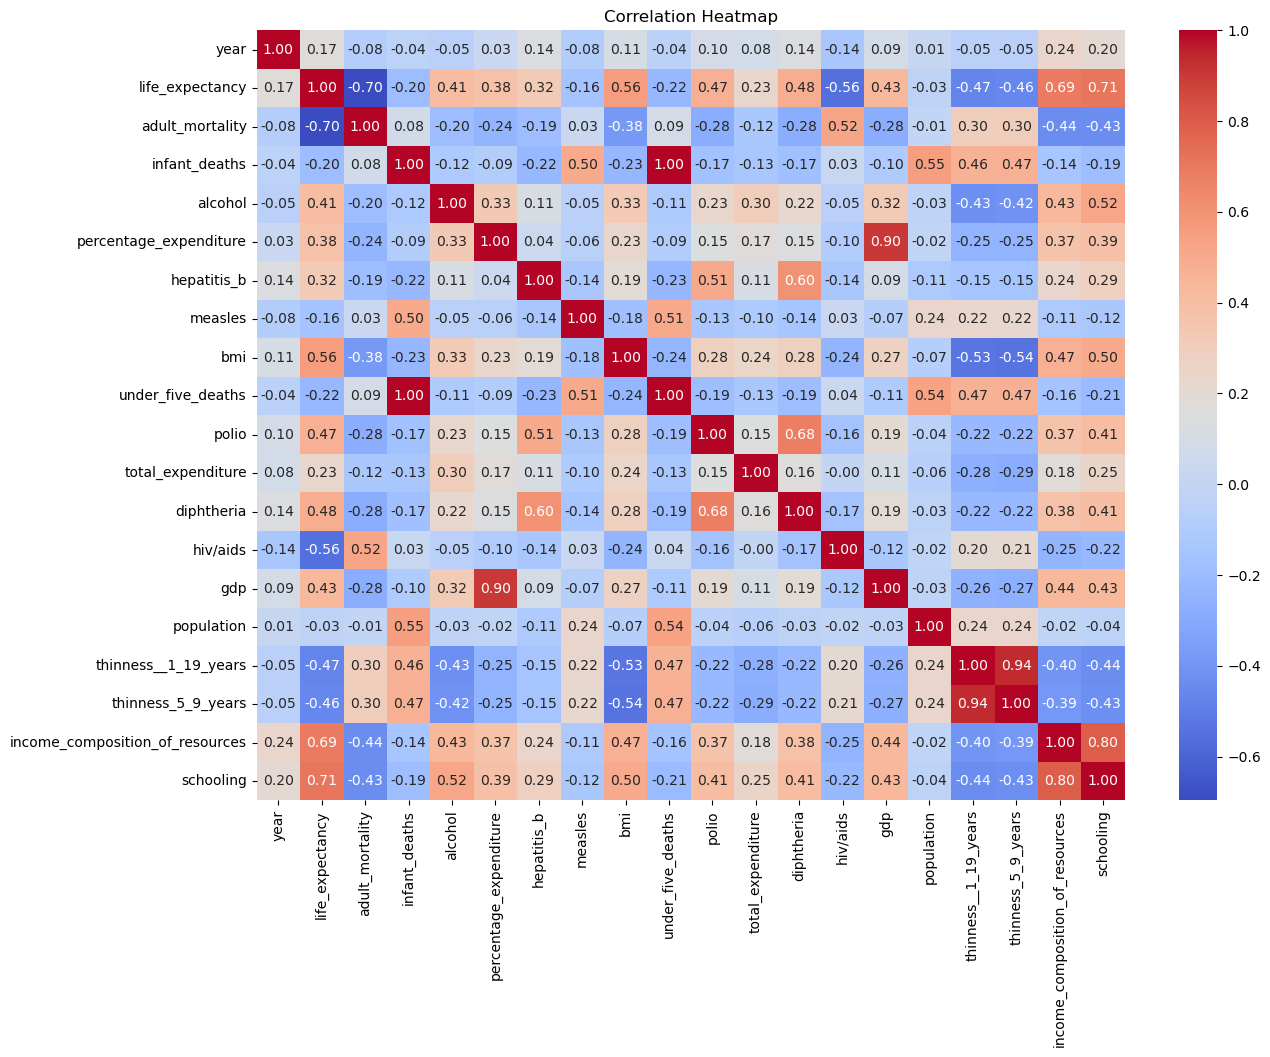

In [14]:
plt.figure(figsize=(14,10))
corr = backup.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Key Insights : 

Higher schooling & income shows "Higher life expectancy" (corr ≈ 0.73)

Higher adult mortality & infant deaths shows "Lower life expectancy" (corr ≈ -0.69)

Education boosts income (strong correlation) (corr ≈ 0.75)

Health expenditure increases with GDP (corr ≈ 0.85)

Vaccination (e.g., Diphtheria) linked to longer life (corr ≈ 0.48)

Underweight (thinness) reduces life expectancy (corr ≈ -0.86)

In [15]:
corr_target = corr['life_expectancy'].sort_values(ascending=False)
print(corr_target)


life_expectancy                    1.000000
schooling                          0.713054
income_composition_of_resources    0.688662
bmi                                0.556901
diphtheria                         0.483609
polio                              0.470416
gdp                                0.431619
alcohol                            0.405080
percentage_expenditure             0.381418
hepatitis_b                        0.322708
total_expenditure                  0.227268
year                               0.170819
population                        -0.029015
measles                           -0.157767
infant_deaths                     -0.196769
under_five_deaths                 -0.222738
thinness_5_9_years                -0.462473
thinness__1_19_years              -0.468002
hiv/aids                          -0.556703
adult_mortality                   -0.696390
Name: life_expectancy, dtype: float64


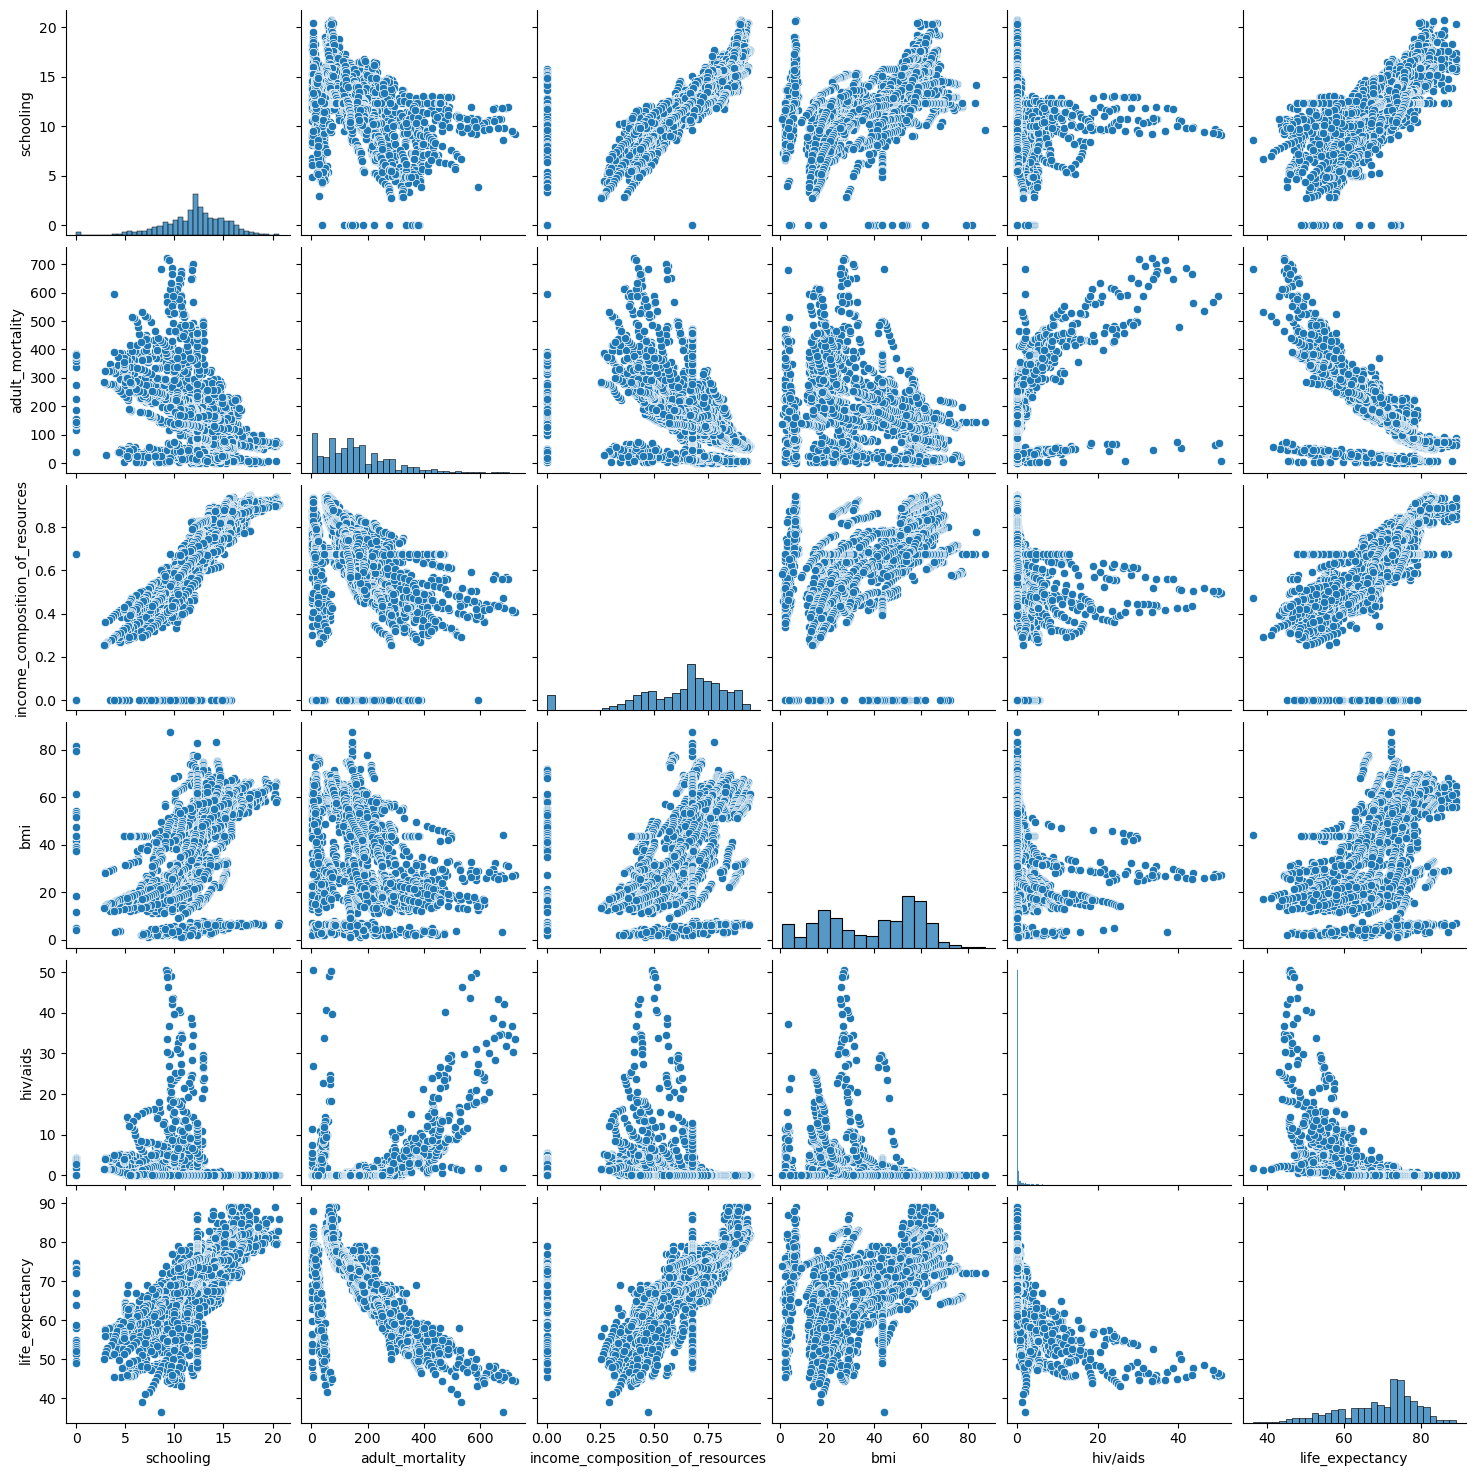

In [26]:
top_corr_features = corr['life_expectancy'].abs().sort_values(ascending=False)[1:6].index
sns.pairplot(data=backup, vars=top_corr_features.tolist() + ['life_expectancy'])
plt.savefig('life_expectancy_by_status.png', dpi=300, bbox_inches='tight')
plt.show()


- Health Crises are Critical: Life expectancy is dramatically reduced by high Adult Mortality and HIV/AIDS prevalence. The data shows a sharp, immediate decline, highlighting that controlling these public health crises is the most direct way to improve longevity.

- Socio-Economic Factors are Fundamental: Higher levels of Schooling and Income Composition of Resources (a measure of economic development) are strongly correlated with longer lives. This indicates that long-term investments in education and the economy are essential for building a healthy, long-living population.

- Factors are Interconnected: The variables are not independent. Wealthier and more educated nations tend to have lower mortality rates. This reveals a clear pattern: a "virtuous cycle" of high income, education, and health in developed countries, and a "vicious cycle" in others.

- Correlation is Not Causation (The BMI case): The positive link between BMI and life expectancy doesn't mean gaining weight is healthy. It's an indirect correlation: nations with higher average BMI are often wealthier, with better food security and healthcare, which are the real factors driving longer lifespans.

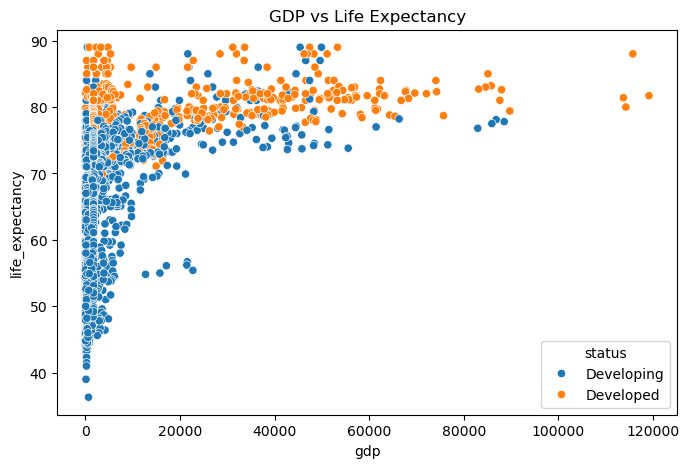

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=backup, x='gdp', y='life_expectancy', hue='status')
plt.title('GDP vs Life Expectancy')
plt.show()


- Strong Positive Correlation: Higher GDP is linked to higher Life Expectancy, but the effect shows diminishing returns; the sharpest increases in longevity happen at lower GDP levels.

- Clear Grouping by Status: "Developed" nations consistently cluster with high GDP and high life expectancy (>75 years). "Developing" nations show far more variance, with many achieving high life expectancy despite lower GDPs.

- GDP Isn't the Only Factor: The success of several "Developing" nations in achieving long life expectancies suggests that targeted public health policies and social infrastructure can be as crucial as overall economic wealth.

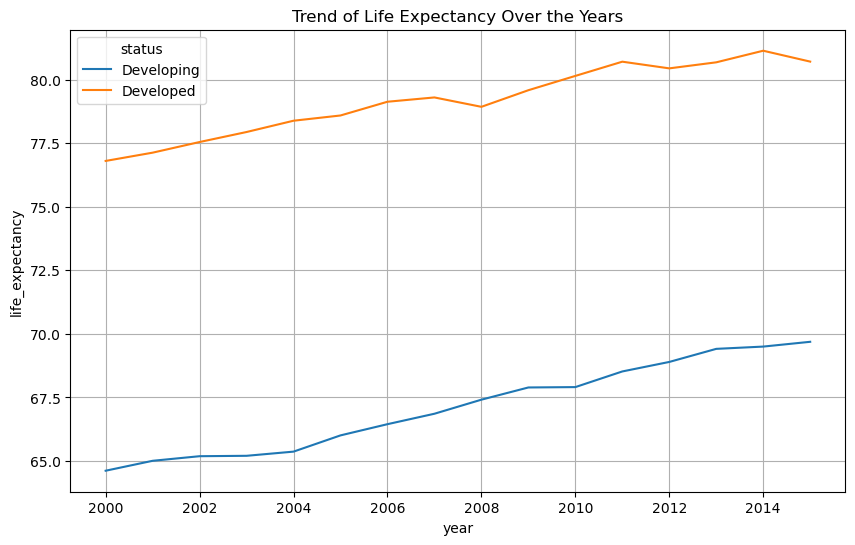

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=backup, x='year', y='life_expectancy', hue='status', estimator='mean', errorbar=None) 
plt.title('Trend of Life Expectancy Over the Years')
plt.grid(True) 
plt.show()

Insights :

- Steady Global Improvement: Both developed and developing countries experienced a consistent increase in average life expectancy between 2000 and 2015.

- Significant and Persistent Gap: A large gap of more than 10 years in life expectancy exists between the two groups, with developed nations consistently having a higher lifespan.

- Slow Convergence: The gap has slightly narrowed over the 15 years, as the rate of improvement in life expectancy has been marginally faster in developing countries.

Conclusion :

- Primary Drivers: A nation's life expectancy is driven by a combination of public health effectiveness and socio-economic development.

- Immediate Health Factors: The most potent and direct negative impacts come from health crises, particularly high Adult Mortality and HIV/AIDS rates.

- Foundational Economic Factors: Long-term gains are built upon a strong foundation of Schooling, Income, and GDP. However, the positive effect of GDP shows diminishing returns after a certain level of wealth is achieved.

- The Development Gap: A significant gap in life expectancy persists between "Developed" and "Developing" nations, but this has been slowly narrowing over time. The data suggests that effective public policy can help developing countries achieve high life expectancies even without top-tier wealth.